**2. Jeu de données : HMEQ**

Cet ensemble de données contient 5960 observations et 13 variables sur les caractéristiques et les informations sur les impayés des prêts sur valeur domiciliaire.

In [1]:
hmeq <- read.csv("../input/home-equity-loan-default/hmeq.csv")
names(hmeq)
dim(hmeq)
str(hmeq)

[1] "BAD"     "LOAN"    "MORTDUE" "VALUE"   "REASON"  "JOB"     "YOJ"    
 [8] "DEROG"   "DELINQ"  "CLAGE"   "NINQ"    "CLNO"    "DEBTINC"

[1] 5960   13

'data.frame':	5960 obs. of  13 variables:
 $ BAD    : int  1 1 1 1 0 1 1 1 1 1 ...
 $ LOAN   : int  1100 1300 1500 1500 1700 1700 1800 1800 2000 2000 ...
 $ MORTDUE: num  25860 70053 13500 NA 97800 ...
 $ VALUE  : num  39025 68400 16700 NA 112000 ...
 $ REASON : chr  "HomeImp" "HomeImp" "HomeImp" "" ...
 $ JOB    : chr  "Other" "Other" "Other" "" ...
 $ YOJ    : num  10.5 7 4 NA 3 9 5 11 3 16 ...
 $ DEROG  : int  0 0 0 NA 0 0 3 0 0 0 ...
 $ DELINQ : int  0 2 0 NA 0 0 2 0 2 0 ...
 $ CLAGE  : num  94.4 121.8 149.5 NA 93.3 ...
 $ NINQ   : int  1 0 1 NA 0 1 1 0 1 0 ...
 $ CLNO   : int  9 14 10 NA 14 8 17 8 12 13 ...
 $ DEBTINC: num  NA NA NA NA NA ...


D'après le rapport ci-dessus, JOB et REASON sont les deux seules variables factorielles au format caractère. 11 autres variables, dont BAD (état par défaut), sont des variables numériques. Nous garderons ce format pour l'instant, cependant quelques temps plus tard au cours de l'analyse, la variable BAD devra être factorisée.

#### II. L'ANALYSE EXPLORATOIRE DES DONNÉES

**1. Nettoyer et préparer l'ensemble de données**

un. Valeurs manquantes

[1] 4740

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



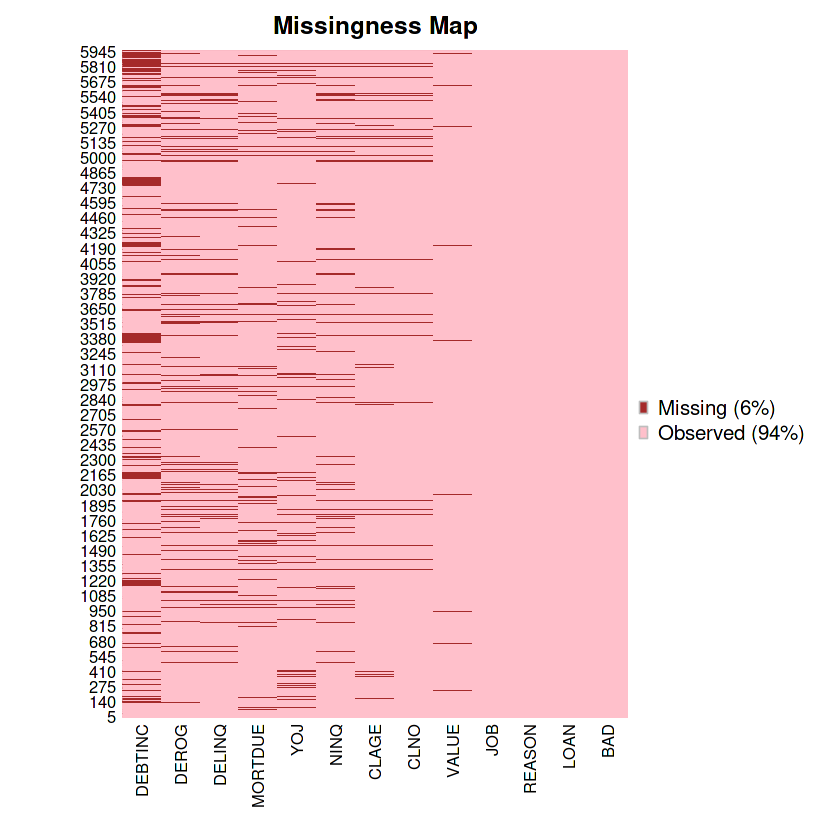

In [2]:
#Number of missing values
sum(is.na(hmeq))
#Visualize
library(Amelia)
library(mlbench)
missmap(hmeq, col = c("brown", "pink"), legend = TRUE)

Il y a 4740 observations sur 5960 avec des valeurs manquantes. Ainsi, nous ne pouvons pas simplement supprimer les lignes avec des valeurs manquantes, car nous nous retrouverions probablement avec un ensemble de données biaisé.

b. Approcher
- Pour les variables numériques, remplacez NA par la moyenne de la colonne.
- Pour les variables factorielles (JOB & REASON), remplacer la catégorie vide "" par "N/A".

[1] 0

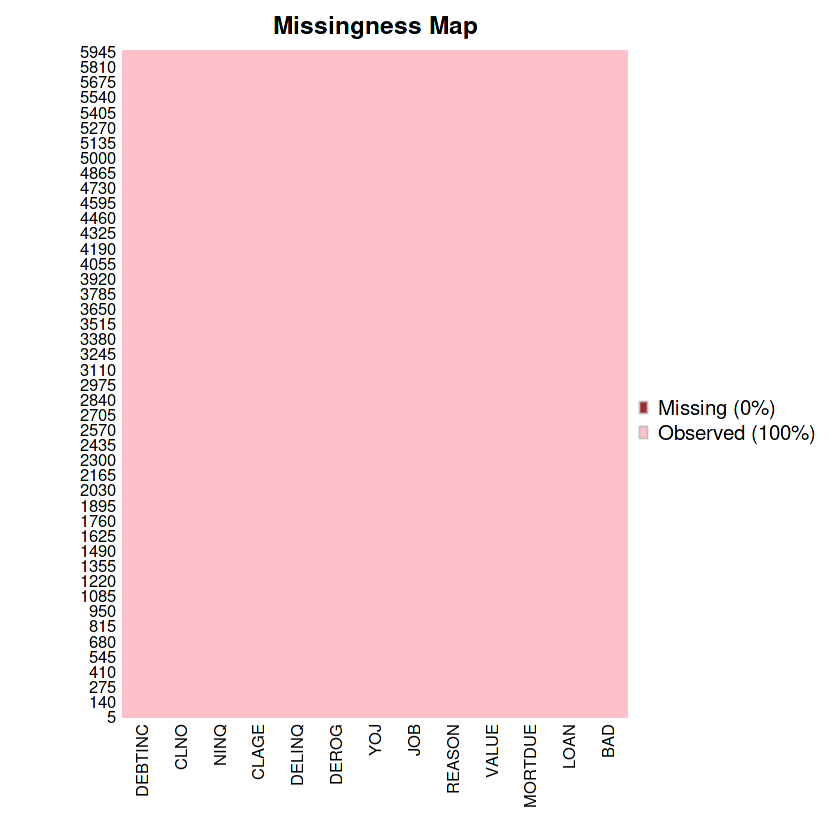

In [3]:
#Numerical variables
hmeq$DEBTINC[which(is.na(hmeq$DEBTINC))] <- mean(hmeq$DEBTINC, na.rm = TRUE)
hmeq$DEROG[which(is.na(hmeq$DEROG))] <- round(mean(hmeq$DEROG, na.rm = TRUE), 0)
hmeq$DELINQ[which(is.na(hmeq$DELINQ))] <- round(mean(hmeq$DELINQ, na.rm = TRUE), 0)
hmeq$MORTDUE[which(is.na(hmeq$MORTDUE))] <- round(mean(hmeq$MORTDUE, na.rm = TRUE), 0)
hmeq$YOJ[which(is.na(hmeq$YOJ))] <- round(mean(hmeq$YOJ, na.rm = TRUE), 1)
hmeq$NINQ[which(is.na(hmeq$NINQ))] <- round(mean(hmeq$NINQ, na.rm = TRUE), 0)
hmeq$CLAGE[which(is.na(hmeq$CLAGE))] <- mean(hmeq$CLAGE, na.rm = TRUE)
hmeq$CLNO[which(is.na(hmeq$CLNO))] <- round(mean(hmeq$CLNO, na.rm = TRUE), 0)
hmeq$VALUE[which(is.na(hmeq$VALUE))] <- round(mean(hmeq$VALUE, na.rm = TRUE), 0)

#Factor variables
hmeq$JOB[hmeq$JOB == ""] <- "N/A"
hmeq$REASON[hmeq$REASON == ""] <- "N/A"

#Observe dataset
sum(is.na(hmeq))
missmap(hmeq, col = c("brown", "pink"), legend = TRUE)

Maintenant que notre ensemble de données est nettoyé des NA, nous pouvons passer au traçage et à la visualisation des données.

**2. Visualisation de données**

In [4]:
#Load required packages
library(ggplot2)
library(cowplot)
library(plotly)
#Factorize BAD into 2 levels: 0: Paid, 1: Defaulted
plot_dt <- hmeq
plot_dt$BAD <- factor(plot_dt$BAD, labels = c("Paid", "Defaulted"))
#Disable exponential notation in graphs
options(scipen = 999) 


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config




a. Relation des prédicteurs avec la variable de réponse BADa. Predictors' relationship with response variable BAD

In [5]:
#BAD vs DELINQ
bar1 <- ggplot(plot_dt, aes(BAD, DELINQ, fill = BAD)) +
  geom_bar(stat = "identity", show.legend = F, width = 0.4) +
  labs(title = "Delinquent Credit Lines", x = "", y = "Delinquent Credit Lines", fill = "Status") +
  theme_bw() +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 10), text = element_text(family = "serif"),
        aspect.ratio = 2/1, panel.grid = element_blank()) +
  scale_fill_manual(values = c("steelblue", "brown")) 
#BAD vs DEBTINC
bar2 <- ggplot(plot_dt, aes(BAD, DEBTINC, fill = BAD)) +
  geom_bar(stat = "identity", show.legend = F, width = 0.4) +
  labs(title = "Debt-Income Ratio", x = "", y = "Debt:Income", fill = "Status") +
  theme_bw() +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 10), text = element_text(family = "serif"),
        aspect.ratio = 2/1, panel.grid = element_blank()) +
  scale_fill_manual(values = c("steelblue", "brown")) 
#BAD vs DEROG
bar3 <- ggplot(plot_dt, aes(BAD, DEROG, fill = BAD)) +
  geom_bar(stat = "identity", show.legend = F, width = 0.4) +
  labs(title = "Derogatory Reports", x = "", y = "Derogatory Reports", fill = "Status") +
  theme_bw() +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 10), text = element_text(family = "serif"),
        aspect.ratio = 2/1, panel.grid = element_blank()) +
  scale_fill_manual(values = c("steelblue", "brown"))  
#BAD vs CLAGE
bar4 <- ggplot(plot_dt, aes(BAD, CLAGE, fill = BAD)) +
  geom_bar(stat = "identity", show.legend = F, width = 0.4) +
  labs(title = "Oldest Credit Line", x = "", y = "Age", fill = "Status") +
  theme_bw() +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 10), text = element_text(family = "serif"),
        aspect.ratio = 2/1, panel.grid = element_blank()) +
  scale_fill_manual(values = c("steelblue", "brown"))  
#BAD vs LOAN
bar5 <- ggplot(plot_dt, aes(BAD, LOAN, fill = BAD)) +
  geom_bar(stat = "identity", show.legend = F, width = 0.4) +
  labs(title = "Loan Request Amount", x = "", y = "Loan", color = "Status") +
  theme_bw() +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 10), text = element_text(family = "serif"),
        aspect.ratio = 2/1, panel.grid = element_blank()) +
  scale_fill_manual(values = c("steelblue", "brown"))
#BAD vs NINQ
bar6 <- ggplot(plot_dt, aes(BAD, NINQ, fill = BAD)) +
  geom_bar(stat = "identity", show.legend = F, width = 0.4) +
  labs(title = "Recent Credit Inquiries", x = "", y = "Recent Inquiries", fill = "Status") +
  theme_bw() +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 10), text = element_text(family = "serif"),
        aspect.ratio = 2/1, panel.grid = element_blank()) +
  scale_fill_manual(values = c("steelblue", "brown"))
#BAD vs CLNO
bar7 <- ggplot(plot_dt, aes(BAD, CLNO, fill = BAD)) +
  geom_bar(stat = "identity", show.legend = F, width = 0.4) +
  labs(title = "Total Credit Lines", x = "", y = "Credit Lines", fill = "Status") +
  theme_bw() +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 10), text = element_text(family = "serif"),
        aspect.ratio = 2/1, panel.grid = element_blank()) +
  scale_fill_manual(values = c("steelblue", "brown"))

À partir de l'ensemble de diagrammes à barres ci-dessus, nous pouvons observer ce qui suit :From the set of bar plot above, we can observe the following:

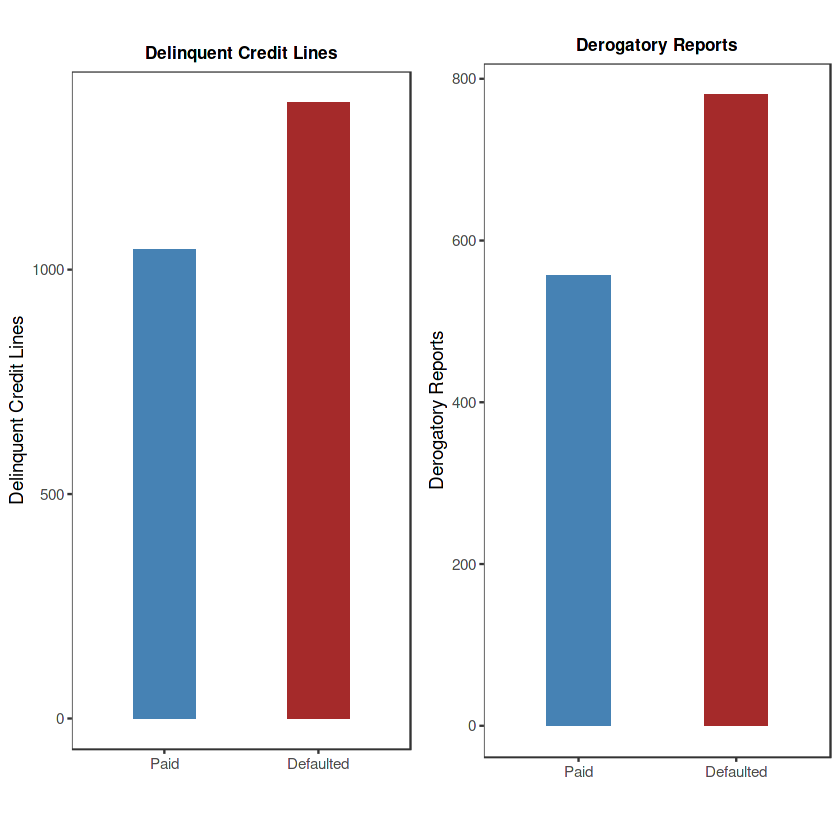

In [6]:
plot_grid(bar1, bar3)

Les emprunteurs qui ont fait défaut sur leur prêt hypothécaire ont plus de lignes de crédit en souffrance et de rapports désobligeants majeurs que ceux qui ne l'ont pas fait.

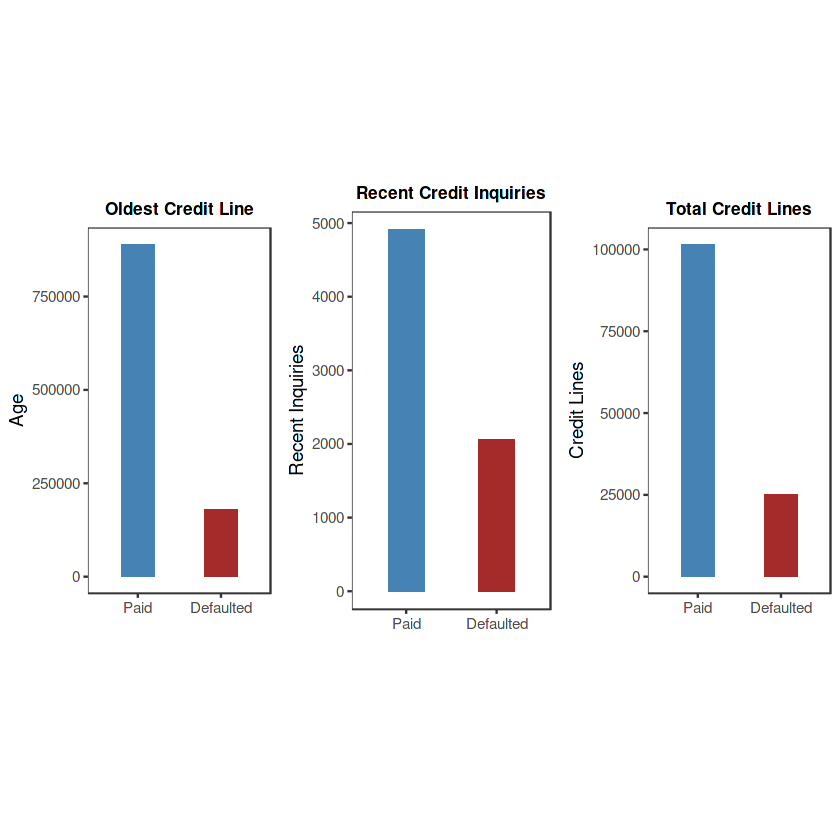

In [7]:
plot_grid(bar4, bar6, bar7, ncol = 3, nrow = 1)

Intuitivement, les emprunteurs qui ont payé leurs prêts sont crédibles auprès de la banque, ont donc des lignes de crédit plus anciennes, font des demandes de crédit plus récentes et ont généralement plus de lignes de crédit au total que les clients en défaut.Intuitively, borrowers who paid their loans are credible to the bank, thus have older credit lines, make more recent credit inquiries, and generally have more credit lines in total than default customers. 

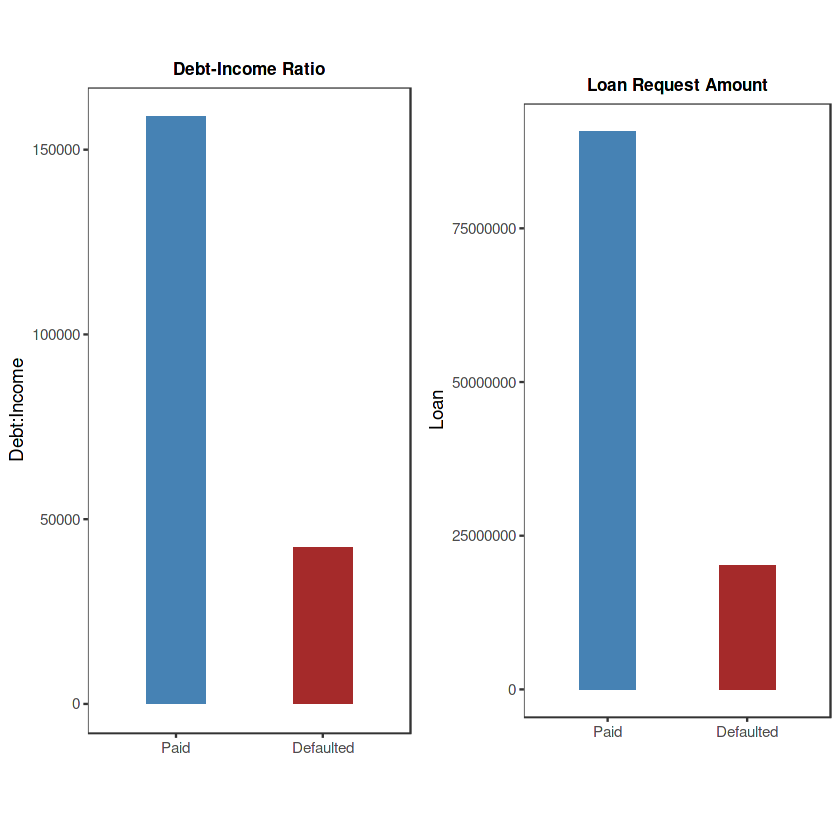

In [8]:
plot_grid(bar2, bar5)

Les emprunteurs qui n'ont pas fait défaut ont un ratio d'endettement ainsi qu'un montant de demande de prêt significativement plus élevés, car ils peuvent continuer à emprunter auprès de la banque compte tenu de leurs lignes de crédit étendues (sans avoir à présenter une nouvelle demande).Borrowers who did not default have significantly higher debt-income ratio as well as loan request amount, as they are able to continue borrowing from the bank given their extensive credit lines (without having to reapply).

b. Corrélation variable

Aperçu de la corrélation des variables :


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "BAD"     "LOAN"    "MORTDUE" "VALUE"   "YOJ"     "DEROG"   "DELINQ" 
 [8] "CLAGE"   "NINQ"    "CLNO"    "DEBTINC"

corrplot 0.88 loaded



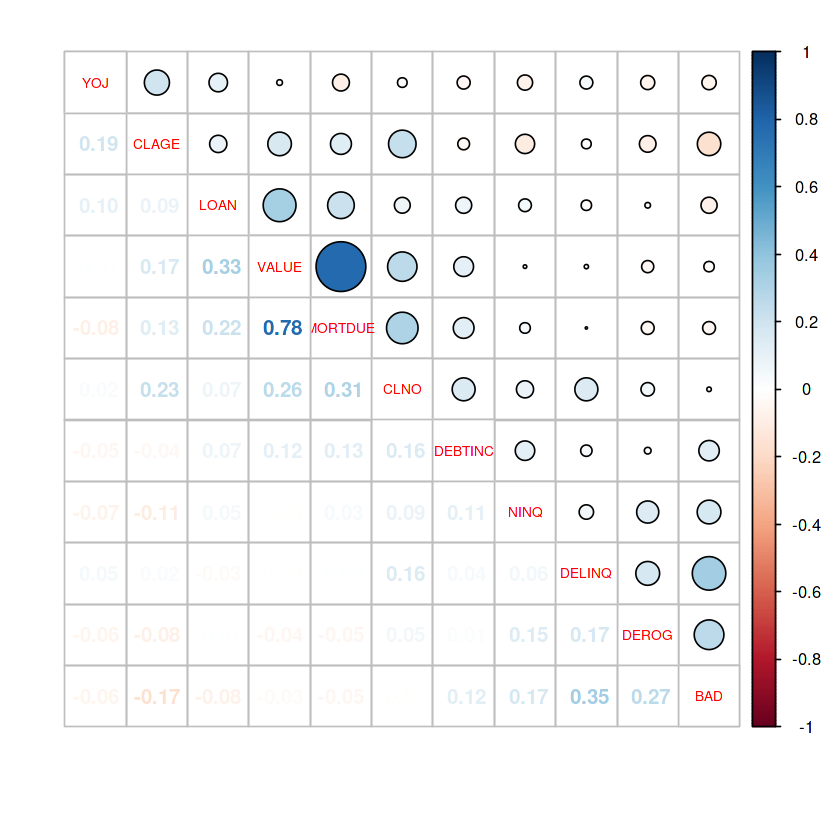

In [9]:
#exclude categorical variables in string format
library(dplyr)
num_var <- hmeq %>% 
  select(BAD, LOAN, MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC)
names(num_var)
#correlation plot with calculated corr
library(corrplot)
corrplot.mixed(cor(num_var), order = "AOE", tl.cex = 0.66, outline = TRUE)

Évaluation de la colinéarité :

La multicolinéarité - ou la co-dépendance des variables - peut réduire considérablement la précision des coefficients bêta estimés, affaiblissant ainsi la signification statistique du modèle de régression. C'est un phénomène que nous souhaitons éviter dans notre modèle final. Nous allons maintenant évaluer les relations entre des ensembles de variables "apparemment" liées.

Warning message:
“Removed 69 rows containing non-finite values (stat_sum).”
Warning message:
“Removed 18 row(s) containing missing values (geom_path).”


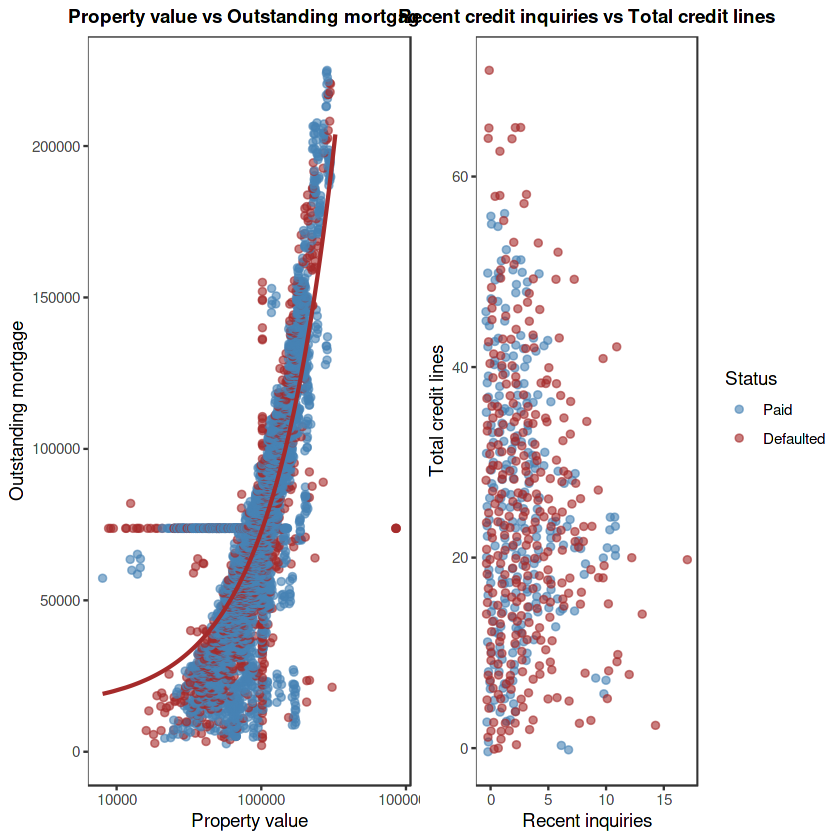

In [10]:
#VALUE vs MORTDUE
fit <- lm(plot_dt$MORTDUE~plot_dt$VALUE)
scatter1 <- ggplot(plot_dt, aes(VALUE, MORTDUE, color = BAD)) +
  geom_count(position = "jitter", alpha = 0.6, size = 1.6, show.legend = F) +
  geom_line(aes(y = predict(fit)), col = "brown", size = 0.9) +
  ylim(c(0, 225000)) +
  scale_x_log10() +
  labs(title = "Property value vs Outstanding mortgage", x = "Property value", y = "Outstanding mortgage", size = "Size", color = "Status") +
  theme_bw() +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 11), text = element_text(family = "serif"),
        panel.grid = element_blank()) +
  scale_color_manual(values = c("steelblue", "brown"))
#NINQ vs CLNO
fit2 <- lm(plot_dt$CLNO~plot_dt$NINQ)
scatter2 <- ggplot(plot_dt, aes(NINQ, CLNO, color = BAD)) +
  geom_count(position = "jitter", alpha = 0.6, size = 1.6) +
  labs(title = "Recent credit inquiries vs Total credit lines", x = "Recent inquiries", y = "Total credit lines", size = "Size", color = "Status") +
  theme_bw() +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 11), text = element_text(family = "serif"),
        panel.grid = element_blank()) +
  scale_color_manual(values = c("steelblue", "brown"))
#Aggregate plots
plot_grid(scatter1, scatter2)

- Il existe une forte relation exponentielle positive entre la valeur actuelle de la propriété des clients et les prêts hypothécaires en cours. Cela indique que MORTDUE et VALUE ne doivent pas être inclus ensemble dans le modèle final.
- D'autre part, il existe une relation extrêmement faible entre les demandes de crédit récentes des clients et le total des lignes de crédit. Cela signifie que l'inclusion de NINQ et CLNO ensemble ne compromettrait pas la précision du modèle.

#### III. DÉVELOPPEMENT D'UN MODÈLE

**1. Sélection de fonctionnalité**

Tout d'abord, nous allons factoriser JOB et REASON (variables avec plus de 2 catégories non liées) en variables distinctes en utilisant un codage à chaud :

In [11]:
#One-hot encoding
library(caret)
dummy <- dummyVars(" ~ .", data=hmeq)
hmeq_new <- data.frame(predict(dummy, newdata = hmeq)) 
names(hmeq_new)
#Factorize BAD into two levels
hmeq_new$BAD <- as.factor(hmeq_new$BAD)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




[1] "BAD"           "LOAN"          "MORTDUE"       "VALUE"        
 [5] "REASONDebtCon" "REASONHomeImp" "REASONN.A"     "JOBMgr"       
 [9] "JOBN.A"        "JOBOffice"     "JOBOther"      "JOBProfExe"   
[13] "JOBSales"      "JOBSelf"       "YOJ"           "DEROG"        
[17] "DELINQ"        "CLAGE"         "NINQ"          "CLNO"         
[21] "DEBTINC"

a. Regression Tree 

rpart variable importance

              Overall
DEBTINC       100.000
DELINQ         58.993
DEROG          58.816
CLAGE          31.626
LOAN           20.934
NINQ           18.271
CLNO            5.423
MORTDUE         0.000
REASONN.A       0.000
JOBOther        0.000
JOBSelf         0.000
JOBN.A          0.000
JOBMgr          0.000
JOBProfExe      0.000
JOBSales        0.000
JOBOffice       0.000
REASONDebtCon   0.000
YOJ             0.000
REASONHomeImp   0.000
VALUE           0.000


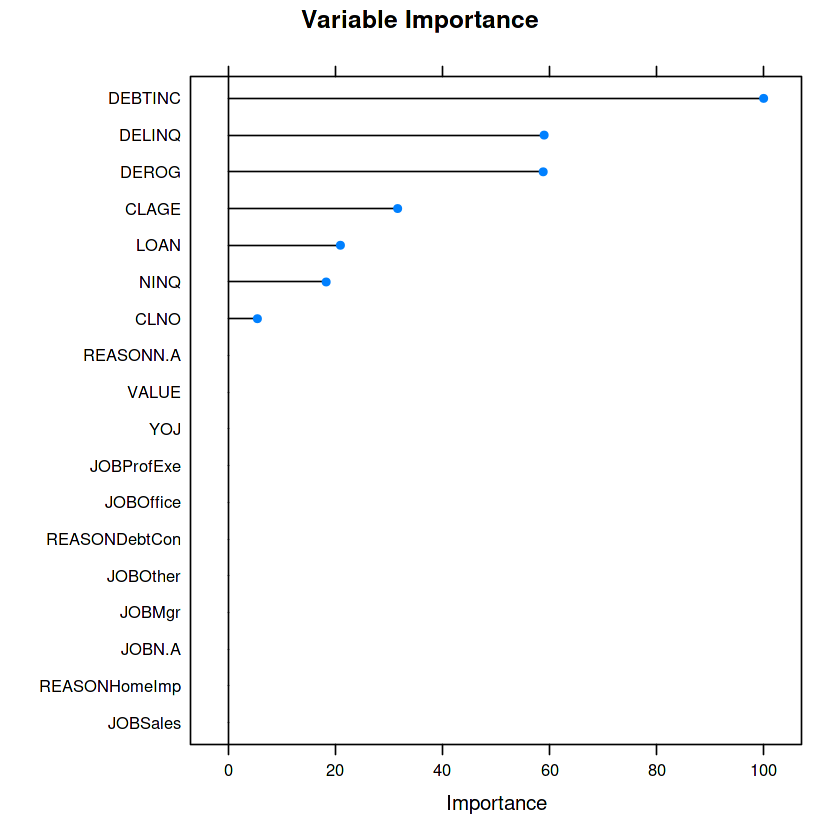

In [12]:
#rpart method to train model
set.seed(26)
model <- train(BAD ~ ., data=hmeq_new, method = "rpart")
rankVars <- varImp(model)
print(rankVars)
#Rank Features By Importance
plot(rankVars, top = 18, main = 'Variable Importance')

Les principales variables classées par importance sont : DEBTINC, DELINQ, DEROG, CLAGE, LOAN, NINQ, CLNO. Nous utiliserons ces variables comme paramètres pour le modèle 1.

b. Random Forest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




,MeanDecreaseGini
LOAN,164.709380
MORTDUE,147.005001
VALUE,157.198782
REASONDebtCon,18.527666
REASONHomeImp,17.744987
REASONN.A,8.592420
JOBMgr,14.608233
JOBN.A,9.421134
JOBOffice,18.049832
JOBOther,23.011395


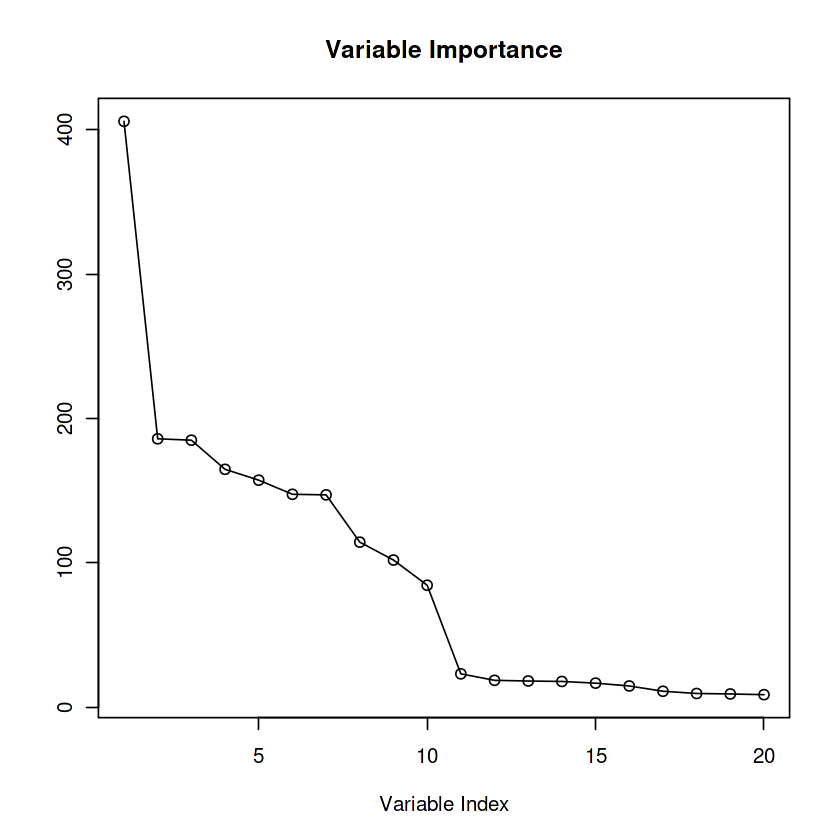

In [13]:
library(randomForest)
rf_model <- randomForest(BAD~., data = hmeq_new)
importance(rf_model)
list<- sort(importance(rf_model), decreasing = TRUE)
plot(list, main = 'Variable Importance', ylab = "", xlab = "Variable Index")
lines(list)

Les principales variables classées par importance sont :  DEBTINC, CLAGE, DELINQ, LOAN, VALUE, CLNO, MORTDUE. 

**2. Logistic Regression**

a. Split data into train and test set: 80:20

In [14]:
set.seed(269)
# Store row numbers for training set: index_train
Z <- sample(1:nrow(hmeq_new), 0.8 * nrow(hmeq_new))
# Create training set: training_set
train <- hmeq_new[Z, ]
# Create test set: test_set
test <- hmeq_new[-Z, ]

b. Compare Models

**Model 1: BAD ~ DEBTINC + DELINQ + DEROG + CLAGE + LOAN + NINQ + CLNO**


Call:
glm(formula = BAD ~ DEBTINC + DELINQ + DEROG + CLAGE + LOAN + 
    NINQ + CLNO, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1849  -0.5983  -0.4506  -0.2942   3.6954  

Coefficients:
                Estimate   Std. Error z value             Pr(>|z|)    
(Intercept) -2.374570893  0.254288845  -9.338 < 0.0000000000000002 ***
DEBTINC      0.052277227  0.006589645   7.933  0.00000000000000214 ***
DELINQ       0.755135891  0.042064787  17.952 < 0.0000000000000002 ***
DEROG        0.636595966  0.059585861  10.684 < 0.0000000000000002 ***
CLAGE       -0.005099449  0.000599859  -8.501 < 0.0000000000000002 ***
LOAN        -0.000019650  0.000004258  -4.615  0.00000392338301608 ***
NINQ         0.167474596  0.022295055   7.512  0.00000000000005835 ***
CLNO        -0.017947870  0.004617156  -3.887             0.000101 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family 

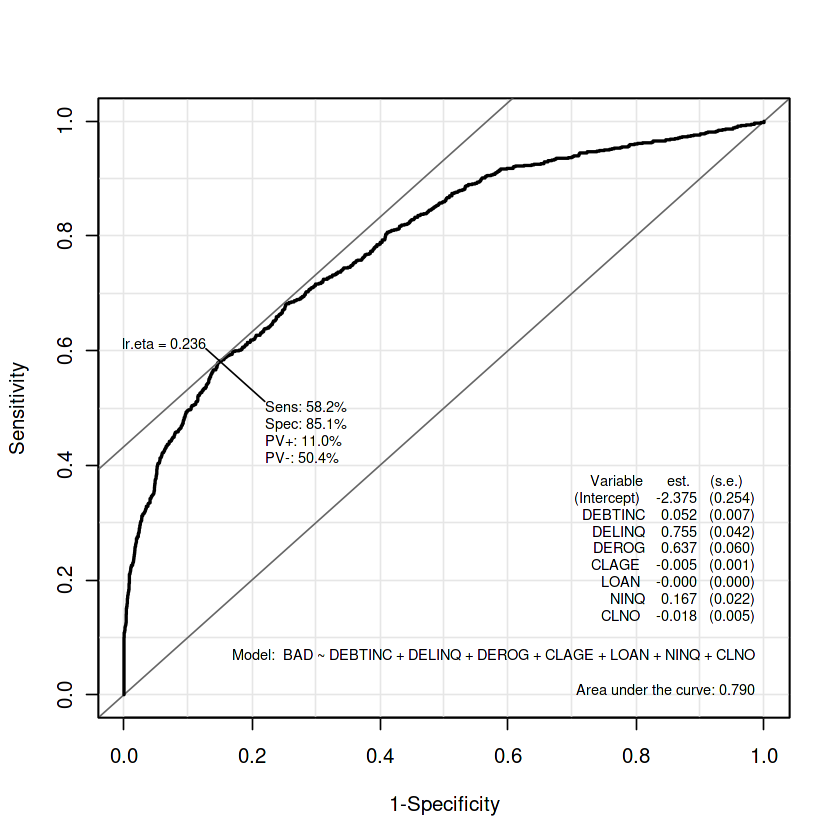

In [15]:
#Fit logistic regression model on training set
train_model <- glm(BAD ~ DEBTINC + DELINQ + DEROG + CLAGE + LOAN + NINQ + CLNO, data = train, family = "binomial")
summary(train_model)
#ROC curve
library(Epi)
ROC(form = BAD ~ DEBTINC + DELINQ + DEROG + CLAGE + LOAN + NINQ + CLNO, data = train, plot = "ROC", MX = TRUE, PV = TRUE)

The best cutoff point for model 1 as shown in the ROC graph is 0.236.
Area under the curve is 0.79, indicating an average/good model performance.

In [16]:
# fit test model to training data
test$Prob = predict(train_model, newdata = test, type = "response") 
test$Prediction = 1*(test$Prob > 0.236)
#Confusion matrix on test data
table(test$Prediction, test$BAD)
#test error rate
mean(test$Prediction != test$BAD)

   
      0   1
  0 801  94
  1 164 133

[1] 0.216443

--> Model 1's test error rate: 0.216443.

In [17]:
#Cross-validate model 1
fitControl <- trainControl(method = "cv", number = 10, savePredictions = T)
modCV <- train(BAD ~ DEBTINC + DELINQ + DEROG + CLAGE + LOAN + NINQ + CLNO, data = hmeq_new, method = "glm", family = "binomial", trControl = fitControl)
summary(modCV)
confusionMatrix(table((modCV$pred)$pred, (modCV$pred)$obs))


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1403  -0.5985  -0.4466  -0.2933   3.8467  

Coefficients:
                Estimate   Std. Error z value             Pr(>|z|)    
(Intercept) -2.285292425  0.225996000 -10.112 < 0.0000000000000002 ***
DEBTINC      0.049980611  0.005891481   8.484 < 0.0000000000000002 ***
DELINQ       0.738766913  0.037250039  19.833 < 0.0000000000000002 ***
DEROG        0.595326659  0.048293071  12.327 < 0.0000000000000002 ***
CLAGE       -0.005602036  0.000541113 -10.353 < 0.0000000000000002 ***
LOAN        -0.000019800  0.000003775  -5.244 0.000000156782268345 ***
NINQ         0.162261533  0.020011518   8.108 0.000000000000000513 ***
CLNO        -0.014469349  0.004079183  -3.547             0.000389 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5956.5  on 5959  degrees of freedom
Residual deviance: 4735.6  on 5952  deg

Confusion Matrix and Statistics

   
       0    1
  0 4628  835
  1  143  354
                                               
               Accuracy : 0.8359               
                 95% CI : (0.8263, 0.8452)     
    No Information Rate : 0.8005               
    P-Value [Acc > NIR] : 0.000000000001424    
                                               
                  Kappa : 0.3426               
                                               
 Mcnemar's Test P-Value : < 0.00000000000000022
                                               
            Sensitivity : 0.9700               
            Specificity : 0.2977               
         Pos Pred Value : 0.8472               
         Neg Pred Value : 0.7123               
             Prevalence : 0.8005               
         Detection Rate : 0.7765               
   Detection Prevalence : 0.9166               
      Balanced Accuracy : 0.6339               
                                               
       'P

**Model 2: BAD ~ DEBTINC + CLAGE + DELINQ + LOAN + VALUE + CLNO + MORTDUE**


Call:
glm(formula = BAD ~ DEBTINC + CLAGE + DELINQ + LOAN + VALUE + 
    CLNO + MORTDUE, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2442  -0.6266  -0.4865  -0.3210   3.9280  

Coefficients:
                Estimate   Std. Error z value             Pr(>|z|)    
(Intercept) -1.985785147  0.246918628  -8.042 0.000000000000000882 ***
DEBTINC      0.053251087  0.006437224   8.272 < 0.0000000000000002 ***
CLAGE       -0.006247398  0.000589412 -10.599 < 0.0000000000000002 ***
DELINQ       0.810777840  0.041184313  19.687 < 0.0000000000000002 ***
LOAN        -0.000015492  0.000004186  -3.701             0.000215 ***
VALUE        0.000001865  0.000001196   1.559             0.118901    
CLNO        -0.010511032  0.004653638  -2.259             0.023904 *  
MORTDUE     -0.000003933  0.000001613  -2.438             0.014758 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial fami

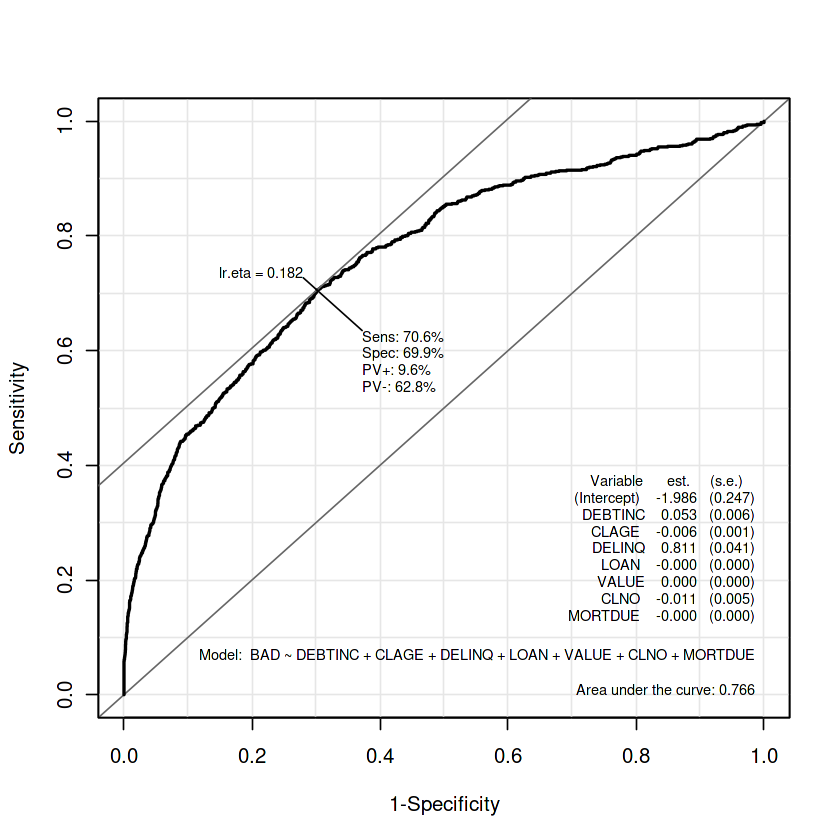

In [18]:
#Fit logistic regression model on training set
train_model2 <- glm(BAD ~ DEBTINC + CLAGE + DELINQ + LOAN + VALUE + CLNO + MORTDUE, data = train, family = "binomial")
summary(train_model2)
#ROC curve
ROC(form = BAD ~ DEBTINC + CLAGE + DELINQ + LOAN + VALUE + CLNO + MORTDUE, data = train, plot = "ROC", MX = TRUE, PV = TRUE)

Le meilleur point de coupure pour le modèle 1, comme indiqué dans le graphique ROC, est de 0,182.
L'aire sous la courbe est de 0,766.

In [19]:
# fit test model to training data
test$Prob = predict(train_model2, newdata = test, type = "response") 
test$Prediction = 1*(test$Prob > 0.182)
#Confusion matrix on test data
table(test$Prediction, test$BAD)
#test error rate
mean(test$Prediction != test$BAD)

   
      0   1
  0 667  63
  1 298 164

[1] 0.3028523

--> Model 2's test error rate: 0.3028523.

In [20]:
#Cross-validate model 2
fitControl <- trainControl(method = "cv", number = 10, savePredictions = T)
modCV <- train(BAD ~ DEBTINC + CLAGE + DELINQ + LOAN + VALUE + CLNO + MORTDUE, data = hmeq_new, method = "glm", family = "binomial", trControl = fitControl)
summary(modCV)
confusionMatrix(table((modCV$pred)$pred, (modCV$pred)$obs))


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1921  -0.6256  -0.4831  -0.3226   4.0662  

Coefficients:
                 Estimate    Std. Error z value             Pr(>|z|)    
(Intercept) -1.9302892298  0.2187053635  -8.826 < 0.0000000000000002 ***
DEBTINC      0.0499505756  0.0057337526   8.712 < 0.0000000000000002 ***
CLAGE       -0.0068228280  0.0005323580 -12.816 < 0.0000000000000002 ***
DELINQ       0.7903255027  0.0365893442  21.600 < 0.0000000000000002 ***
LOAN        -0.0000177699  0.0000037587  -4.728           0.00000227 ***
VALUE        0.0000033555  0.0000009616   3.489             0.000484 ***
CLNO        -0.0076308262  0.0041010607  -1.861             0.062787 .  
MORTDUE     -0.0000042272  0.0000013559  -3.118             0.001822 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5956.5  on 5959  degrees of freedom
Residual deviance: 49

Confusion Matrix and Statistics

   
       0    1
  0 4654  919
  1  117  270
                                               
               Accuracy : 0.8262               
                 95% CI : (0.8163, 0.8357)     
    No Information Rate : 0.8005               
    P-Value [Acc > NIR] : 0.0000002527         
                                               
                  Kappa : 0.2712               
                                               
 Mcnemar's Test P-Value : < 0.00000000000000022
                                               
            Sensitivity : 0.9755               
            Specificity : 0.2271               
         Pos Pred Value : 0.8351               
         Neg Pred Value : 0.6977               
             Prevalence : 0.8005               
         Detection Rate : 0.7809               
   Detection Prevalence : 0.9351               
      Balanced Accuracy : 0.6013               
                                               
       'P

**3. Comparaison des modèles **

In [21]:
test_error <- c(0.216443, 0.3028523)
auc <- c(0.79, 0.76)
accuracy <- c(0.8359, 0.8263)
aic <- c(4751.6, 5015.1)
dts <- data.frame(accuracy, auc, aic, test_error)
colnames(dts) <- c("Accuracy Test", "Area Under Curve", "AIC", "Test Error Rate")
row.names(dts) <- c("Model 1", "Model 2")
dts

,Accuracy Test,Area Under Curve,AIC,Test Error Rate
,<dbl>,<dbl>,<dbl>,<dbl>
Model 1,0.8359,0.79,4751.6,0.2164430
Model 2,0.8263,0.76,5015.1,0.3028523


Après avoir comparé 2 modèles, nous choisissons le modèle 1 comme modèle final.